# DDoS Detection using Machine Learning

+ Ravali Kolloju
+ Sai Santoshi Naga Bhanu Tejaswini Movva
+ Madhav Gadupudi 
+ Hari Chandana Daggubati 

## Abstract

Denial of Service (DoS) and Distributed Denial of Service (DDoS) attacks are dangerous threats to online services. This project seeks to analyze machine learning techniques in the detection of DDoS attacks by using the apaddos dataset, which gives labeled network traffic data for normal and attack scenarios. It applies some classification algorithms, such as Decision Trees, Random Forests, and XGBoost, to detect patterns of malicious traffic significantly. The results show how well machine learning works in improving cybersecurity to develop a more resistant online system against these attacks.

These attacks as DoS and DDoS now greatly threaten online services. In the thesis, the project targets the application of machine learning in detecting DDoS attacks with the aid of a public apaddos dataset that contains labeled network traffic data for both normal and attack scenarios. The classification algorithms applied here are Decision Trees, Random Forests, and XGBoost. It depicts how the application of the above classifiers accurately detects patterns of malicious traffic. The outcomes import implications on the fact that machine learning applications improve cyber security by creating more resistant online systems against these attkc.s.

## Introduction

The safety of cyber world is equally made important in modern times, especially of DoS and DDoS attacks. These attacks are very severe because they can cripple online services such as websites and applications by flooding them with considerably huge traffic, making it impossible for genuine users to access them. It does crank up customer dissatisfaction, as well as lead to enormous revenue losses for companies.

To that end, apaddos dataset that contains insight into DDoS attack has always been a good fight and keeps fighting. This dataset is information-rich in normal and malicious network traffic. This includes IP addresses, TCP port numbers, and packets counting because they are important for creating effective detection systems.

From this data, machine learning techniques shall be adopted to develop tools that can accurately classify legitimate traffic and attack traffic. Such research goes a long way toward keeping effective cybersecurity while ensuring that critical online services are functioning well and secure enough for businesses as well as their customers from disruption threats.

## Literature Review

Data exploration is crucial for understanding the various patterns in the dataset. Tukey (1977) proposed Exploratory Data Analysis (EDA) as a disarmingly simple and highly unstructured method of approaching data [1]. In the field of DDoS detection, EDA proves useful in identifying features that distinguish between clean traffic and attack patterns, which assists in building effective models (Ho, 2018). DDoS attacks often overwhelm systems with malicious traffic. Previous studies have highlighted the effectiveness of machine learning approaches in identifying network traffic as either normal or anomalous (Bhuyan et al., 2015; Behal et al., 2017) [2][3]. This project employs machine learning techniques along with balanced training data to ensure good generalization.

Handling high-dimensional datasets, such as network traffic data, often requires feature engineering. Feature selection must resolve instances of overlapping features and eliminate those that do not improve model performance (Guyon & Elisseeff, 2003) [5]. This project uses correlation-based feature selection to enhance the model's performance, as suggested by Chandrashekar & Sahin (2014). Proper treatment of missing values, categorical data, and normalization are vital to maintain data accuracy and improve model inputs (García et al., 2015; Kang et al., 2021) [4].

Supervised machine learning classification models are well-suited for DDoS detection. Random Forest, for example, has been shown to effectively detect attack patterns in network traffic (Latah & Toker, 2021; Alzubaidi & Kalita, 2016) [6][7]. This project applies techniques like one-hot encoding for categorical features, such as IP addresses, to transform non-numeric data into a machine-learning-compatible format, as recommended by Bockhorst & Craven (2002) [8].

Despite advancements, issues like high false positives remain a significant challenge in DDoS detection (Liao et al., 2013) [9]. This project addresses these challenges by balancing the dataset, refining feature engineering methods, and focusing on specific features to enhance model performance.

### References

1. Tukey, J. W. (1977). *Exploratory Data Analysis*. Addison-Wesley.
2. Bhuyan, M. H., Bhattacharyya, D. K., & Kalita, J. K. (2015). Network anomaly detection: Methods, systems, and tools. *IEEE Communications Surveys & Tutorials, 16*(1), 303–336.
3. Behal, S., Kumar, K., & Batra, S. (2017). Characterizing DDoS attacks and flash events: Review, research gaps, and future directions. *Computer Science Review, 25*, 101–114.
4. García, S., Luengo, J., & Herrera, F. (2015). *Data preprocessing in data mining*. Springer International Publishing.
5. Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. *Journal of Machine Learning Research, 3*, 1157–1182.
6. Latah, M., & Toker, L. (2021). Application of artificial intelligence to detect and mitigate DDoS attacks: A survey. *Computer Networks, 188*, 107837.
7. Alzubaidi, A., & Kalita, J. (2016). Detecting anomalies in cloud environments: A machine learning perspective. *Journal of Cloud Computing: Advances, Systems and Applications, 5*(1), 23.
8. Bockhorst, J., & Craven, M. (2002). Markov networks for detecting network intrusions. In *Proceedings of the 17th International Conference on Machine Learning* (pp. 50-57). Morgan Kaufmann.
9. Liao, H.-J., Lin, C.-H. R., Lin, Y.-C., & Tung, K.-Y. (2013). Intrusion detection system: A comprehensive review. *Journal of Network and Computer Applications, 36*(1), 16–24.


### Imports

In [3]:
#Importing the required modules
!pip install xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

### Data Collection/Cleaning/Processing/Description:

Dataset Link: https://www.kaggle.com/code/noureldinhamedo/ddos-detection-using-machine-learning/input

Description of the DataseThe dataset has 151,200 records and 23 attributes that capture network traffic features such as IP addresses, ports, protocols, TCP flags, and packet statistics. It has been labeled for DDoS detection by categorizing traffic types for further machine-learning-based anomaly detectiol.

### Lets load the data into a dataframe

In [5]:
ddos=pd.read_csv('./APA-DDoS-Dataset.csv')
ddos.head()

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK


### Number of data rows

In [7]:
#Priting the number of rows
print(f"Length of dataset: {len(ddos)}")
#Printing the shape of the dataset
print(f"Shape of the dataset : {ddos.shape}")

Length of dataset: 151200
Shape of the dataset : (151200, 23)


### Datatypes of the data

In [9]:
# Display concise information about the DataFrame, including data types and non-null counts
ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip.src           151200 non-null  object
 1   ip.dst           151200 non-null  object
 2   tcp.srcport      151200 non-null  int64 
 3   tcp.dstport      151200 non-null  int64 
 4   ip.proto         151200 non-null  int64 
 5   frame.len        151200 non-null  int64 
 6   tcp.flags.syn    151200 non-null  int64 
 7   tcp.flags.reset  151200 non-null  int64 
 8   tcp.flags.push   151200 non-null  int64 
 9   tcp.flags.ack    151200 non-null  int64 
 10  ip.flags.mf      151200 non-null  int64 
 11  ip.flags.df      151200 non-null  int64 
 12  ip.flags.rb      151200 non-null  int64 
 13  tcp.seq          151200 non-null  int64 
 14  tcp.ack          151200 non-null  int64 
 15  frame.time       151200 non-null  object
 16  Packets          151200 non-null  int64 
 17  Bytes     

### Column Descriptions for the DDoS Detection Dataset

- **ip.src**: Source IP address of the network traffic.
- **ip.dst**: Destination IP address of the network traffic.
- **tcp.srcport**: Source port number for TCP (Transmission Control Protocol).
- **tcp.dstport**: Destination port number for TCP.
- **ip.proto**: IP protocol used (e.g., TCP, UDP).
- **frame.len**: Length of the network frame.
- **tcp.flags.syn**: TCP SYN flag, part of the TCP three-way handshake used to initiate connections.
- **tcp.flags.reset**: TCP RST flag, used to reset a connection.
- **tcp.flags.push**: TCP PSH flag, indicates that the receiver should pass the data to the application immediately.
- **tcp.flags.ack**: TCP ACK flag, used to acknowledge the receipt of data.
- **ip.flags.mf**: IP More Fragments flag, indicates that the packet is a fragment of a larger packet.
- **ip.flags.df**: IP Do Not Fragment flag, indicates hat the pack
e label of network event.

### Checking for Nulls
Checking for nulls (or missing values) in a dataset is a crucial step in the data preprocessing phase. Detecting and handling null values is essential to avoid any misinterpretation.

In [11]:
ddos.isna().sum()

ip.src             0
ip.dst             0
tcp.srcport        0
tcp.dstport        0
ip.proto           0
frame.len          0
tcp.flags.syn      0
tcp.flags.reset    0
tcp.flags.push     0
tcp.flags.ack      0
ip.flags.mf        0
ip.flags.df        0
ip.flags.rb        0
tcp.seq            0
tcp.ack            0
frame.time         0
Packets            0
Bytes              0
Tx Packets         0
Tx Bytes           0
Rx Packets         0
Rx Bytes           0
Label              0
dtype: int64

### checking for duplicate values

In [13]:
data_dup=ddos.duplicated().any()
data_dup

False

In [15]:
## There are no duplicates or nulls that needs to be dropped, so we can proceed into our analysis.
ddos.groupby('Label').size()

Label
Benign          75600
DDoS-ACK        37800
DDoS-PSH-ACK    37800
dtype: int64

We have 75600 Benign, and 75600 DDOS attacks

### Dataset Description

In [17]:
ddos.describe()

,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,ip.flags.mf,ip.flags.df,ip.flags.rb,tcp.seq,tcp.ack,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes
count,151200.000000,151200.0,151200.0,151200.000000,151200.0,151200.0,151200.000000,151200.0,151200.0,151200.000000,151200.0,151200.0,151200.0,151200.000000,151200.000000,151200.000000,151200.000000,151200.000000,151200.000000
mean,27376.943247,8000.0,6.0,99.025126,0.0,0.0,0.500000,1.0,0.0,0.500000,0.0,1.0,1.0,9.082665,799.422937,5.048776,390.683981,4.033889,408.738955
std,19634.879546,0.0,0.0,71.226673,0.0,0.0,0.500002,0.0,0.0,0.500002,0.0,0.0,0.0,2.129620,373.759057,1.353814,177.223153,0.963107,197.105807
min,1302.000000,8000.0,6.0,54.000000,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,1.0,1.0,1.000000,54.000000,1.000000,54.000000,0.000000,0.000000
25%,8621.000000,8000.0,6.0,54.000000,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,1.0,1.0,8.000000,432.000000,4.000000,216.000000,4.000000,216.000000
50%,26263.000000,8000.0,6.0,60.000000,0.0,0.0,0.500000,1.0,0.0,0.500000,0.0,1.0,1.0,10.000000,1101.500000,6.000000,550.000000,4.000000,551.500000
75%,45566.000000,8000.0,6.0,105.000000,0.0,0.0,1.000000,1.0,0.0,1.000000,0.0,1.0,1.0,10.000000,1146.000000,6.000000,560.000000,4.000000,586.000000
max,60998.000000,8000.0,6.0,223.000000,0.0,0.0,1.000000,1.0,0.0,1.000000,0.0,1.0,1.0,20.000000,1229.000000,10.000000,561.000000,10.000000,668.000000


In [19]:
# Generate a descriptive statistics summary for the DataFrame, transpose, and style the output for better visibility
ddos.describe().T.style.set_properties(**{
    "background-color": "green",
    "font-size": "17px",
    "color": "white",
    "border-radius": "1px",
    "border": "1.5px solid black"
})

,count,mean,std,min,25%,50%,75%,max
tcp.srcport,151200.000000,27376.943247,19634.879546,1302.000000,8621.000000,26263.000000,45566.000000,60998.000000
tcp.dstport,151200.000000,8000.000000,0.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
ip.proto,151200.000000,6.000000,0.000000,6.000000,6.000000,6.000000,6.000000,6.000000
frame.len,151200.000000,99.025126,71.226673,54.000000,54.000000,60.000000,105.000000,223.000000
tcp.flags.syn,151200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tcp.flags.reset,151200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tcp.flags.push,151200.000000,0.500000,0.500002,0.000000,0.000000,0.500000,1.000000,1.000000
tcp.flags.ack,151200.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ip.flags.mf,151200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ip.flags.df,151200.000000,0.500000,0.500002,0.000000,0.000000,0.500000,1.000000,1.000000


### Data Visualization and Research Question

#### Research Question
How effectively can network traffic features be utilized to distinguish between DDoS attacks and benign traffic?

### Hypotheses and Their Usage in Visualizations

**H₁ (Alternative Hypothesis)**  
- **Correlation Heatmap**: Identifies strong relationships between features like `Packets`, `Bytes`, and `Tx Packets`, supporting the hypothesis that these features help distinguish DDoS traffic.  
- **Feature Selection**: Dropping less impactful features tests H₁ by retaining predictors expected to improve classification.

**H₀ (Null Hypothesis)**  
- If the heatmap shows weak correlations or model performance remains unchanged after feature selection, H₀ is supported, indicating no significant relationship between features and DDoS detection.

These hypotheses will be formally tested during the modeling phase. Visualizations help explore and preliminarily validate feature revance.
elevance.


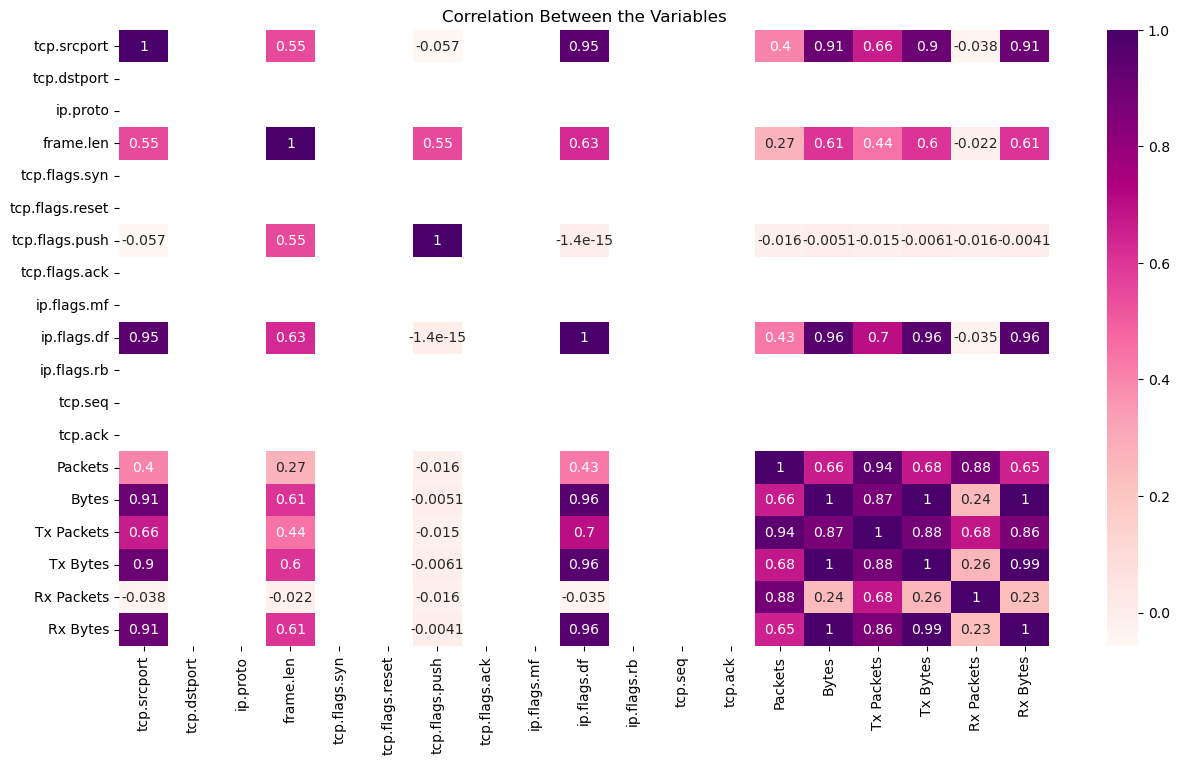

In [21]:
numeric_data = ddos.select_dtypes(include='number')# select only the columns in the DataFrame data that have numeric (number) data
correlation_matrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True,ax=ax,  cmap="RdPu")
plt.title('Correlation Between the Variables')
#plt.xticks(rotation=45);
plt.show()

## Correlation Analysis

### Dropped Columns
For the purpose of improving model efficiency and focusing on more relevant features, the following columns will be dropped:

- **tcp.dstport**: The destination port number for TCP is not contributing significantly to the detection of DDoS attacks in this case.
- **ip.proto**: The IP protocol used (e.g., TCP, UDP) will be excluded, as the attack patterns are more influenced by other features.
- **tcp.flags.syn**: The SYN flag in TCP is less relevant for the task at hand.
- **tcp.flags.reset**: Similarly, the TCP RESET flag does not provide much useful information for detecting DDoS attacks.
- **tcp.flags.ack**: The ACK flag in TCP will also be dropped as it doesn't play a major role in distinguishing attack types in this dataset.
- **ip.flags.mf**: The "More Fragments" flag in IP packets will be excluded.
- **ip.flags.rb**: The reserved bits in the IP header are not critical to the detection process and will be dropped.
- **tcp.seq**: The TCP sequence number will be omitted, as it does not contribute directly to attack classification in this context.
- **tcp.ack**: The TCP acknowledgment number will also be dropped for similar reasons to the sequence number.

By removing these columns, we aim to focus on the most impactful features for effective DDoS attack detection while reducing noise and improving model performance.
b
tcp.seq,tcp.ack

In [27]:
columns_to_drop = ['tcp.dstport', 'ip.proto', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.ack', 'ip.flags.mf', 'ip.flags.rb', 'tcp.seq', 'tcp.ack']
ddos_new= ddos.drop(columns=columns_to_drop).copy()
ddos_new

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,54,1,0,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,54,1,0,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,54,1,0,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,54,1,0,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,54,1,0,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,66,0,1,16-Jun 2020 22:10:46.923006000 Mountain Dayli...,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,66,0,1,16-Jun 2020 22:10:46.935672000 Mountain Dayli...,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,66,0,1,16-Jun 2020 22:10:46.957469000 Mountain Dayli...,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,66,0,1,16-Jun 2020 22:10:46.970971000 Mountain Dayli...,10,1175,6,560,4,615,Benign


In [29]:
# We don't need the frame.time as well
ddos_new= ddos_new.drop(columns=['frame.time'])
ddos_new

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,54,1,0,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,54,1,0,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,54,1,0,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,54,1,0,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,54,1,0,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,66,0,1,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,66,0,1,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,66,0,1,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,66,0,1,10,1175,6,560,4,615,Benign


### Preparing the Data

In [31]:
# Assuming your DataFrame is named df
ddos_new['Label_new'] = ddos_new['Label'].apply(lambda x: 'Benign' if x == 'Benign' else 'DDoS')
ddos_new.drop(columns=['Label'], inplace=True)
ddos_new.rename(columns={'Label_new': 'Label'}, inplace=True)
ddos_new

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,54,1,0,8,432,4,216,4,216,DDoS
1,192.168.1.1,192.168.23.2,2413,54,1,0,10,540,5,270,5,270,DDoS
2,192.168.1.1,192.168.23.2,2414,54,1,0,12,648,6,324,6,324,DDoS
3,192.168.1.1,192.168.23.2,2415,54,1,0,10,540,5,270,5,270,DDoS
4,192.168.1.1,192.168.23.2,2416,54,1,0,6,324,3,162,3,162,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,66,0,1,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,66,0,1,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,66,0,1,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,66,0,1,10,1175,6,560,4,615,Benign


In [33]:
y = ddos_new['Label']
y

0           DDoS
1           DDoS
2           DDoS
3           DDoS
4           DDoS
           ...  
151195    Benign
151196    Benign
151197    Benign
151198    Benign
151199    Benign
Name: Label, Length: 151200, dtype: object

#### Lets Encode the y

In [35]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[1 1 1 ... 0 0 0]


#### There are many ip addresses so we need to encode them using one hot encoding. There is no ordinality so using label encoding for would be biases.

In [37]:

X = ddos_new.drop(columns=['Label']).copy()

categorical_columns = ['ip.src', 'ip.dst']  # Select categorical columns for one-hot encoding

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_columns)  # Corrected the argument name to sparse_output
    ],
    remainder='passthrough'
)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_encoded = pipeline.fit_transform(X)

# Get the column names after encoding
encoded_column_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns)
column_names = list(encoded_column_names) + list(X.columns.difference(categorical_columns))

# Convert the encoded data to a DataFrame
X = pd.DataFrame(X_encoded, columns=column_names)

In [36]:
X

,ip.src_192.168.1.1,ip.src_192.168.10.1,ip.src_192.168.11.1,ip.src_192.168.13.1,ip.src_192.168.14.1,ip.src_192.168.16.1,ip.src_192.168.17.1,ip.src_192.168.19.1,ip.src_192.168.2.1,ip.src_192.168.20.1,...,Bytes,Packets,Rx Bytes,Rx Packets,Tx Bytes,Tx Packets,frame.len,ip.flags.df,tcp.flags.push,tcp.srcport
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2412.0,54.0,1.0,0.0,8.0,432.0,4.0,216.0,4.0,216.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2413.0,54.0,1.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2414.0,54.0,1.0,0.0,12.0,648.0,6.0,324.0,6.0,324.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2415.0,54.0,1.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2416.0,54.0,1.0,0.0,6.0,324.0,3.0,162.0,3.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,37360.0,66.0,0.0,1.0,10.0,1146.0,6.0,560.0,4.0,586.0
151196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,37362.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0
151197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,37364.0,66.0,0.0,1.0,10.0,1144.0,6.0,560.0,4.0,584.0
151198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,37366.0,66.0,0.0,1.0,10.0,1175.0,6.0,560.0,4.0,615.0


### Model Training

In [39]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Split the data into training and testing sets

In [40]:
X_train

,ip.src_192.168.1.1,ip.src_192.168.10.1,ip.src_192.168.11.1,ip.src_192.168.13.1,ip.src_192.168.14.1,ip.src_192.168.16.1,ip.src_192.168.17.1,ip.src_192.168.19.1,ip.src_192.168.2.1,ip.src_192.168.20.1,...,Bytes,Packets,Rx Bytes,Rx Packets,Tx Bytes,Tx Packets,frame.len,ip.flags.df,tcp.flags.push,tcp.srcport
39462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34562.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
86399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13220.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
46424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40372.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
123679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54482.0,66.0,0.0,1.0,10.0,1170.0,6.0,560.0,4.0,610.0
23643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5706.0,54.0,1.0,0.0,8.0,432.0,4.0,216.0,4.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46882.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6153.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
131932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,46358.0,66.0,0.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
146867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,56936.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0


In [42]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [44]:
class_counts = np.bincount(y_train)
print(f'Count for class 0 (Benign): {class_counts[0]}')
print(f'Count for class 1 (DDoS): {class_counts[1]}')

Count for class 0 (Benign): 60431
Count for class 1 (DDoS): 60529


In [41]:
#Build the model 
X_train

,ip.src_192.168.1.1,ip.src_192.168.10.1,ip.src_192.168.11.1,ip.src_192.168.13.1,ip.src_192.168.14.1,ip.src_192.168.16.1,ip.src_192.168.17.1,ip.src_192.168.19.1,ip.src_192.168.2.1,ip.src_192.168.20.1,...,Bytes,Packets,Rx Bytes,Rx Packets,Tx Bytes,Tx Packets,frame.len,ip.flags.df,tcp.flags.push,tcp.srcport
39462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34562.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
86399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13220.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
46424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40372.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
123679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54482.0,66.0,0.0,1.0,10.0,1170.0,6.0,560.0,4.0,610.0
23643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5706.0,54.0,1.0,0.0,8.0,432.0,4.0,216.0,4.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46882.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6153.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
131932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,46358.0,66.0,0.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
146867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,56936.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0


In [45]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree * 100:.2f}%")

Decision Tree Accuracy: 100.00%


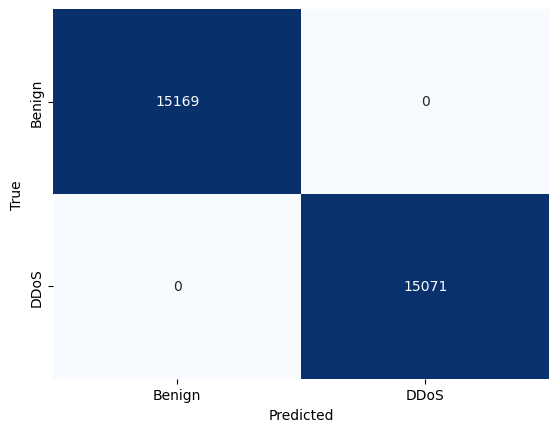

In [47]:
cm = confusion_matrix(y_test, y_pred_decision_tree)
class_labels = ["Benign", "DDoS"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Accuracy: 100.00%


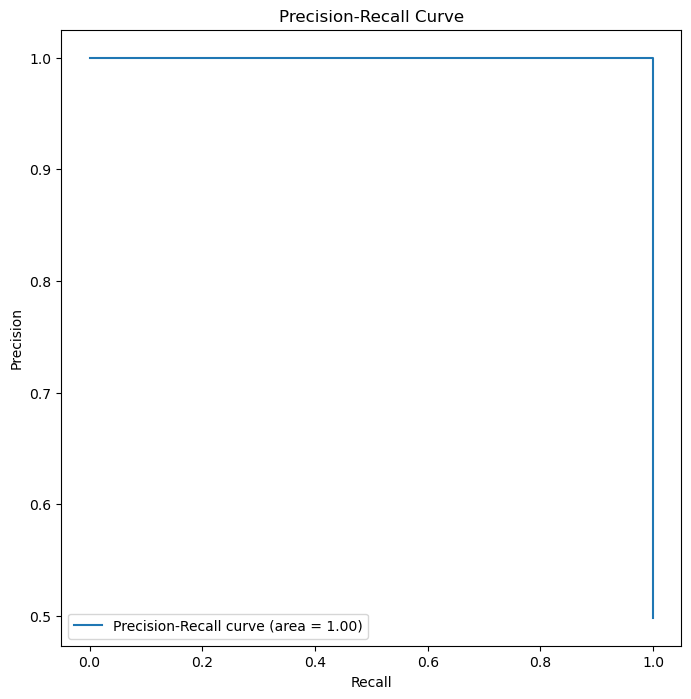

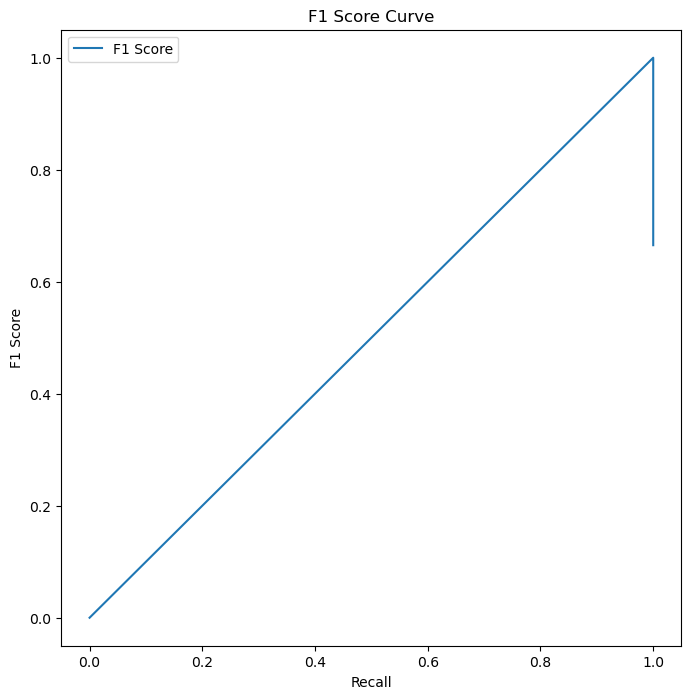

In [49]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)#  predict

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot precision-recall curve
fig, ax = plt.subplots(figsize=(8, 8))
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
area = auc(recall, precision)

plt.plot(recall, precision, label=f'Precision-Recall curve (area = {area:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Plot F1 score
fig, ax = plt.subplots(figsize=(8, 8))
f1 = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1, label='F1 Score')
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='best')
plt.show()

The precision-recall area is 1, this usually indicates that the model is performing very well in terms of precision and recall.

F1 score curve is a straight line with a slope of 45 degrees indicates that the model is achieving a balanced trade-off between precision and recall across different decision thresholds. In other words, the F1 score is constant regardless of the threshold, suggesting that the model is equally effective in capturing both positive instances and avoiding false positives.

These results are promising and suggest good generalization.

In [51]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


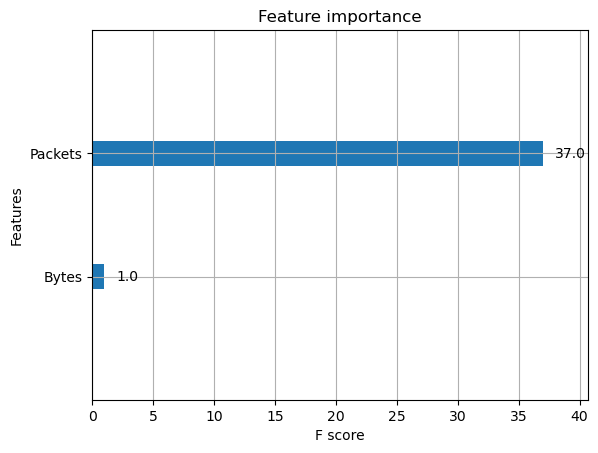

In [53]:
plot_importance(xgb_model)
plt.show()

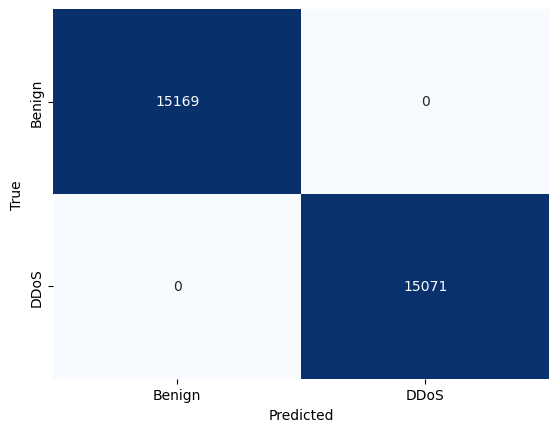

In [55]:
cm = confusion_matrix(y_test, y_pred)
class_labels = ["Benign", "DDoS"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

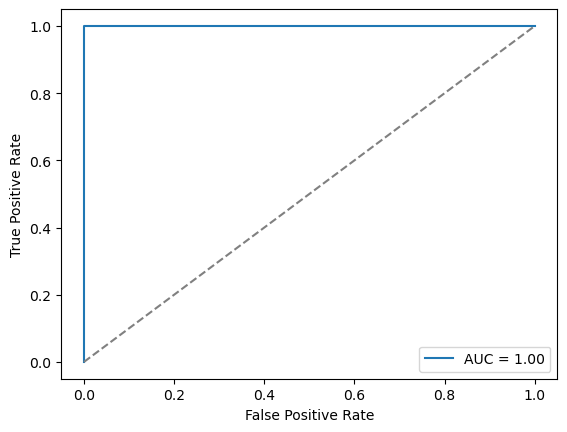

In [57]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## RESULTS AND CONCLUSION

Models created for detection of DDoS attacks using machine learning exhibited a remarkable performance measure of 100%, with the Decision Tree, Random Forest, and XGBoost classifiers not yielding any misclassified value in the confusion matrix. For the Random Forest model, its precision-recall curve had an area under the curve (AUC) of 1, thereby showing an excellent capacity in differentiating benign from DDoS traffic. This was confirmed by the ROC curve for the XGBoost model proving that the model generalized well and did not overfit. The number of packets was also found to be the most significant feature on which to base a prediction, being more or less in line with DDoS attacks. While these are promising results, they also raise flags overfitting in real time; thus, testing should also be done on different diverse datasets for robustness and trustworthiness. For the course of these findings, it finds machine learning indicative to enrich cybersecurity measures against DDoS attacks while also building up the ways towards robust, secure online systems. Yet furtherwork, like cross-validation and continuous learning, should be conducted to improve adaptability in dynamic environments.




### References
- https://www.kaggle.com/code/noureldinhamedo/ddos-detection-using-machine-learning
- https://www.kaggle.com/code/noureldinhamedo/ddos-detection-using-machine-learning/input